<a href="https://colab.research.google.com/github/azkalltlhn/RandomForest_Algorithm/blob/main/Task/Random_Forest_Azka_Lailatul_Hana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style='darkgrid')
df_load=pd.read_csv("data_telco.csv")

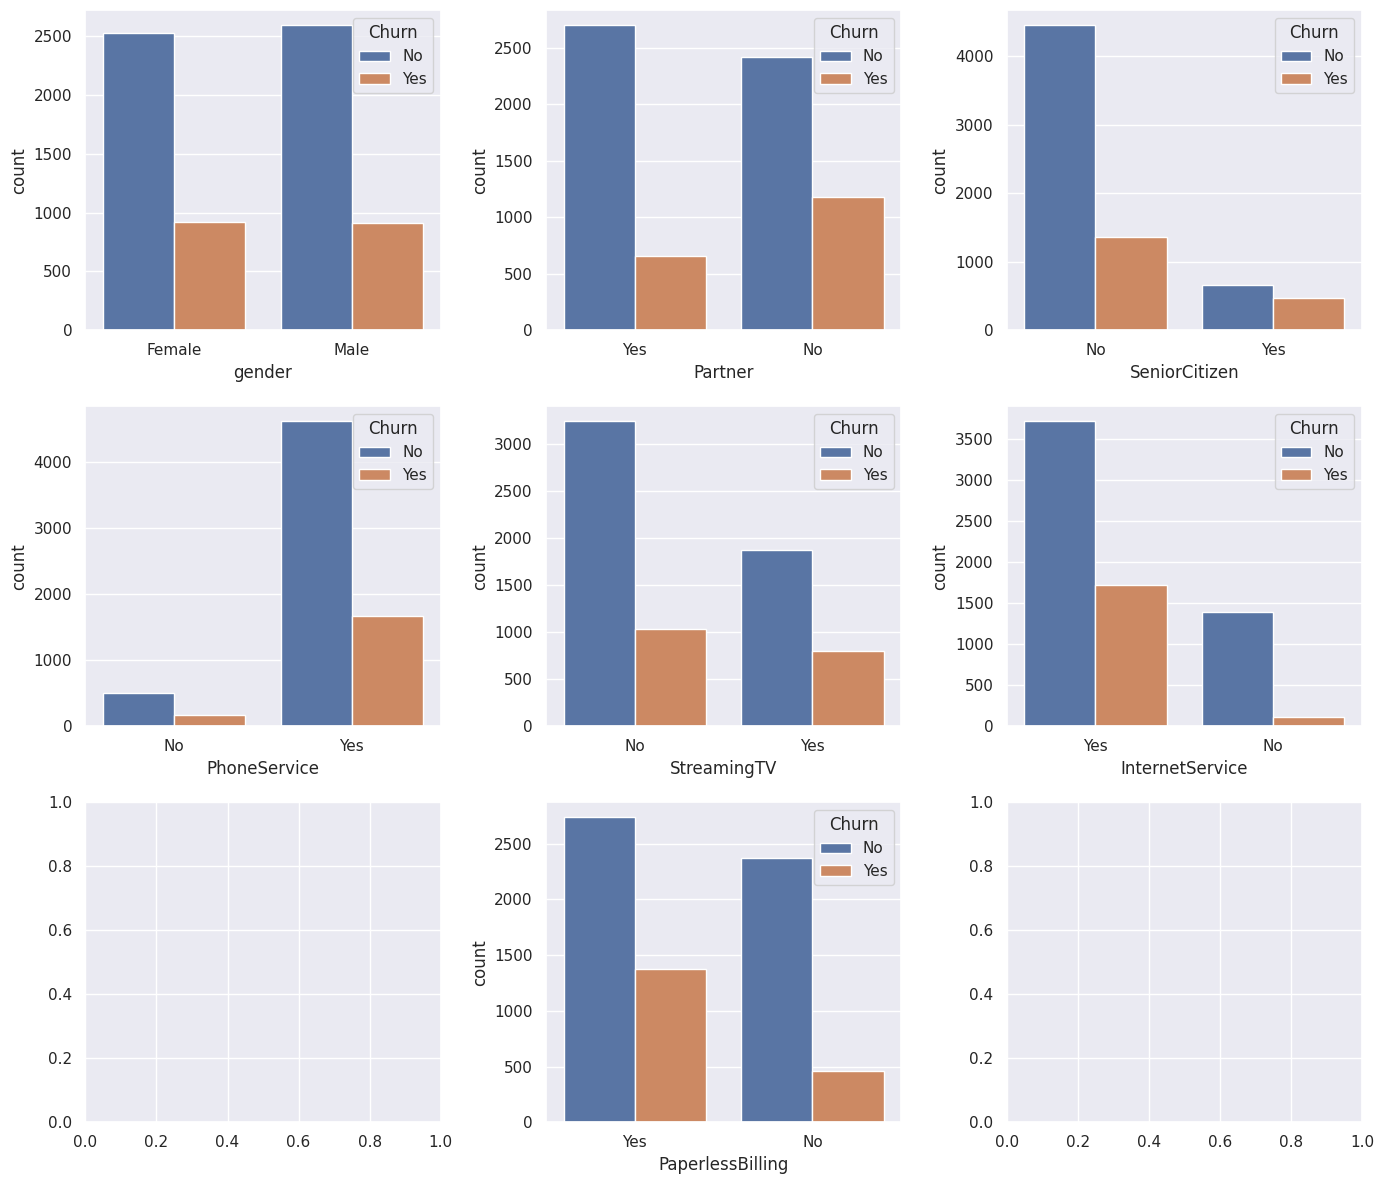

In [3]:
fig,ax = plt.subplots(3,3, figsize=(14,12))
#Definisikan Countplot() untuk membuat plot dengan jumlah observasi pada masing-masing matriks
sns.countplot (data=df_load, x='gender',hue='Churn',ax=ax[0][0])
sns.countplot (data=df_load, x='Partner',hue='Churn',ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn',ax=ax[0][2])
sns.countplot (data=df_load, x='PhoneService',hue='Churn',ax=ax[1][0])
sns.countplot (data=df_load,x='StreamingTV', hue='Churn',ax=ax[1][1])
sns.countplot (data=df_load,x='InternetService', hue='Churn',ax=ax[1][2])
sns.countplot(data=df_load,x='PaperlessBilling',hue='Churn',ax=ax[2][1])
plt.tight_layout()
plt.show()

In [4]:
print(df_load.shape)

(6950, 13)


In [5]:
print(df_load.head())

   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No           81.25       4620.40   

  Churn  
0    No  
1    No  
2   Yes 

In [6]:
print(df_load.customerID.nunique)

<bound method IndexOpsMixin.nunique of 0       45759018157
1       45315483266
2       45236961615
3       45929827382
4       45305082233
           ...     
6945    45437311872
6946    45184632574
6947    45023517923
6948    45665022680
6949    45957014561
Name: customerID, Length: 6950, dtype: int64>


In [7]:
cleaned_df = df_load.drop(['customerID', 'UpdatedAt'], axis=1)
print(cleaned_df.head())

   gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0  Female            No     Yes       1           No          No   
1    Male            No     Yes      60          Yes          No   
2    Male            No      No       5          Yes         Yes   
3  Female            No     Yes      72          Yes         Yes   
4  Female            No     Yes      56          Yes         Yes   

  InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0             Yes              Yes           29.85         29.85    No  
1              No              Yes           20.50       1198.80    No  
2             Yes               No          104.10        541.90   Yes  
3             Yes              Yes          115.50       8312.75    No  
4             Yes               No           81.25       4620.40    No  


In [8]:
import numpy as np

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
#Convert semua atribut non-numeric menjadi tipe data numerical
for column in cleaned_df.columns:
  if cleaned_df[column].dtype == np.number: continue
  #Lakukan Pengkodean
  cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

<ipython-input-10-e1d253dd0a74>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-10-e1d253dd0a74>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-10-e1d253dd0a74>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-10-e1d253dd0a74>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-10-e1d253dd0a74>:3: DeprecationWa

In [11]:
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

In [12]:
print(cleaned_df)

      gender  SeniorCitizen  Partner  tenure  PhoneService  StreamingTV  \
0          0              0        1       1             0            0   
1          1              0        1      60             1            0   
2          1              0        0       5             1            1   
3          0              0        1      72             1            1   
4          0              0        1      56             1            1   
...      ...            ...      ...     ...           ...          ...   
6945       1              0        0       1             1            0   
6946       0              1        0       1             1            0   
6947       0              0        0       1             1            1   
6948       0              0        1      72             1            1   
6949       1              0        0      64             1            0   

      InternetService  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  
0                   

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']

In [15]:
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape, ', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print( 'Prosentase Churn di data Training adalah: ')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape, ', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah: ')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah: 
Churn
0    0.734841
1    0.265159
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah: 
Churn
0    0.738129
1    0.261871
Name: proportion, dtype: float64


In [17]:
from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
y_train_pred = rdf_model.predict(x_train)
print(rdf_model)

RandomForestClassifier()


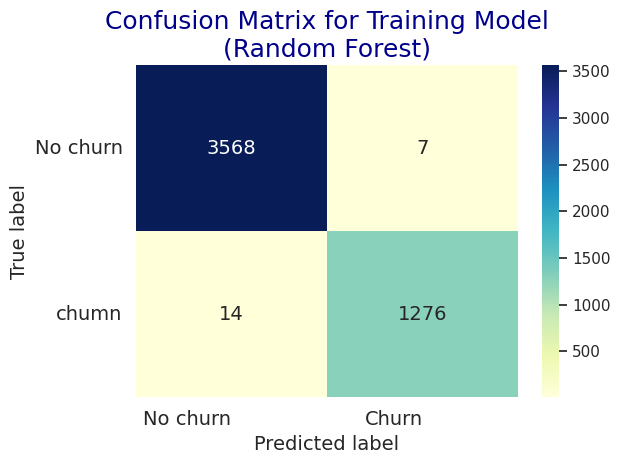

In [18]:
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn','chumn'), ('No churn', 'Churn'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=0, ha='right',fontsize=14)
plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [19]:
# data training
from sklearn.metrics import classification_report

# Prediksi dengan data training
y_train_pred = rdf_model.predict(x_train)

#Cetak Classification Report Untuk Model Random Forest
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred))


Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



In [20]:
# Pembentukan model dengan RandomForestClassifier
rdf_model = RandomForestClassifier().fit(x_test, y_test)
y_test_pred = rdf_model.predict(x_test)
print(rdf_model)

RandomForestClassifier()


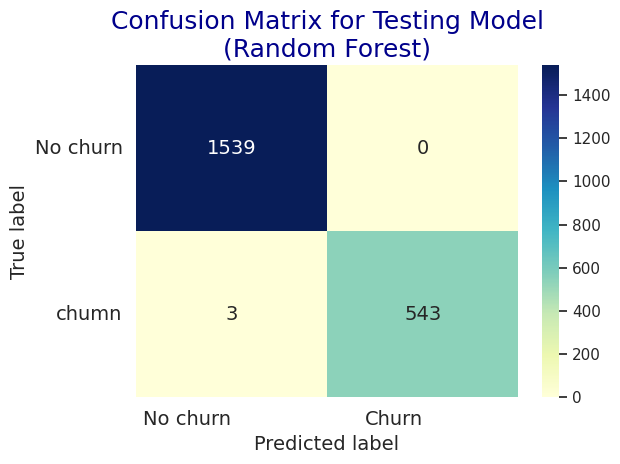

In [21]:
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn','chumn'), ('No churn', 'Churn'))
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=0, ha='right',fontsize=14)
plt.title('Confusion Matrix for Testing Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [22]:
# data testing
from sklearn.metrics import classification_report

# Prediksi dengan data testing
y_train_pred = rdf_model.predict(x_test)

#Cetak Classification Report Untuk Model Random Forest
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1539
           1       1.00      0.99      1.00       546

    accuracy                           1.00      2085
   macro avg       1.00      1.00      1.00      2085
weighted avg       1.00      1.00      1.00      2085

